### PROJECT 3: TITANIC SURVIVAL PREDICTION

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df=pd.read_csv("C:\\OneDrive\\Desktop\DA\\Titanic-Dataset.csv")

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
print(df.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
# One-hot encode 'Sex' column
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,False,False,True


In [9]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,False,False,False
3,1,1,35.0,1,0,53.1000,False,False,True
6,0,1,54.0,0,0,51.8625,True,False,True
10,1,3,4.0,1,1,16.7000,False,False,True
11,1,1,58.0,0,0,26.5500,False,False,True


In [11]:
from sklearn.model_selection import train_test_split
# X contains the features (excluding 'Survived')
# y contains the target variable ('Survived')

X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have X_train (features for training), y_train (target for training),
# X_test (features for testing), and y_test (target for testing)


In [12]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,False,False,False
3,1,35.0,1,0,53.1000,False,False,True
6,1,54.0,0,0,51.8625,True,False,True
10,3,4.0,1,1,16.7000,False,False,True
11,1,58.0,0,0,26.5500,False,False,True


In [13]:
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [14]:
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.77      0.87      0.82        23

    accuracy                           0.76        37
   macro avg       0.75      0.72      0.73        37
weighted avg       0.75      0.76      0.75        37



C:\Users\sarva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an SVM classifier (you can choose linear or kernel-based)
svm_model = SVC(kernel='linear')  # Linear SVM

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.67      0.78      0.72        23

    accuracy                           0.62        37
   macro avg       0.58      0.57      0.57        37
weighted avg       0.60      0.62      0.61        37



In [16]:
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
tree_model = DecisionTreeClassifier()

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37



In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37



AttributeError: 'numpy.int64' object has no attribute 'startswith'

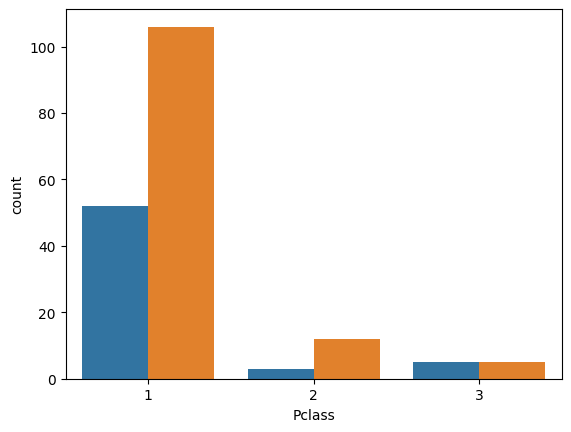

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.savefig('Pclass.jpg',dpi=300,bbox_inches='tight')
plt.show()


C:\Users\sarva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


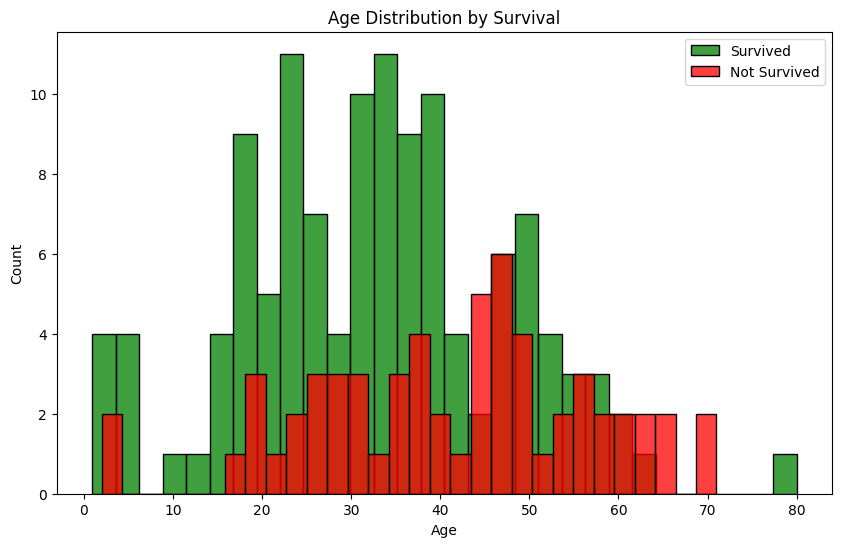

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=False, label='Survived', color='green')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=False, label='Not Survived', color='red')
plt.legend()
plt.title('Age Distribution by Survival')
plt.savefig('survivedAge.jpg',dpi=300,bbox_inches='tight')
plt.show()


C:\Users\sarva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


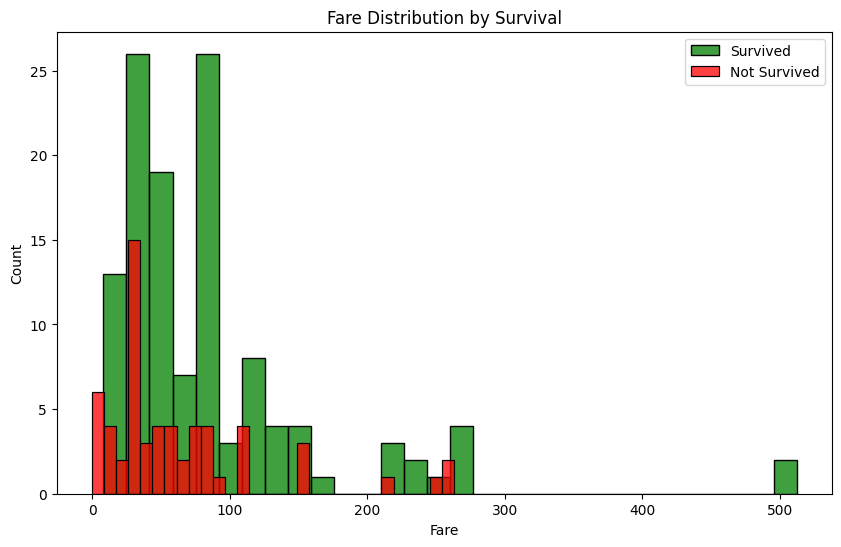

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Fare'], bins=30, kde=False, label='Survived', color='green')
sns.histplot(df[df['Survived'] == 0]['Fare'], bins=30, kde=False, label='Not Survived', color='red')
plt.legend()
plt.title('Fare Distribution by Survival')
plt.savefig('Fare.jpg',dpi=300,bbox_inches='tight')
plt.show()


AttributeError: 'numpy.int32' object has no attribute 'startswith'

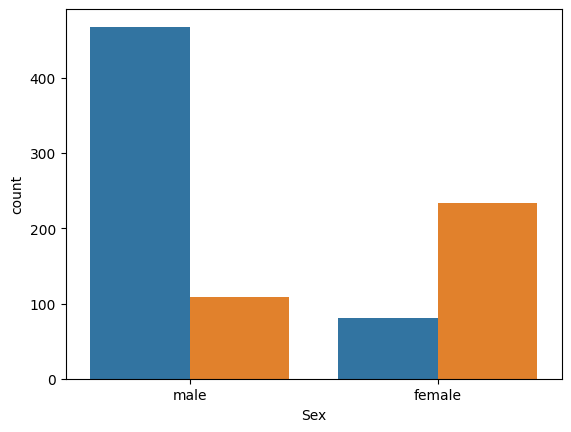

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the columns are of the correct data type
df['Sex'] = df['Sex'].astype(str)
df['Survived'] = df['Survived'].astype(int)

# Create the count plot
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Sex')

# Add legend with proper labels
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Show the plot
plt.show()

# Save the plot with high resolution
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.savefig('sex.jpg')
plt.show()
